[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Shirt color

b) Height

c) Flipping a coin (heads/tails)

d) Time

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

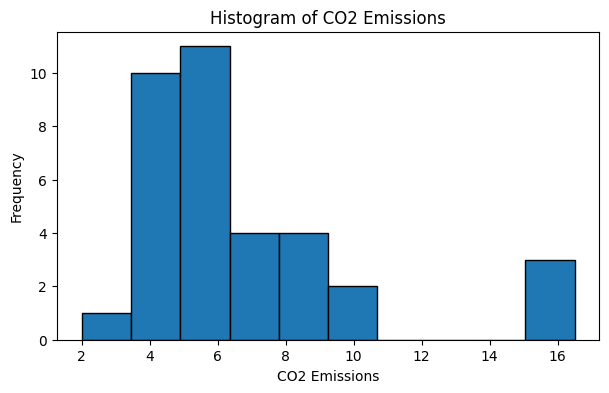

In [17]:
plt.figure(figsize=(7,4))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.title("Histogram of CO2 Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

Part b. Find the mean, median, and standard deviation.

In [18]:
mean_co2 = np.mean(carbon_west['CO2'])
median_co2 = np.median(carbon_west['CO2'])
std_co2 = np.std(carbon_west['CO2'])

print(f"Carbon Emissions\n\nMean: {mean_co2}\nMedian: {median_co2}\nStandard Deviation: {std_co2}")

# carbon_west.describe().loc[["mean", "50%", "std"]]

Carbon Emissions

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [19]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [20]:
murders_masked = murders.loc[(murders["state"] != "DC")]
masked_mean = np.mean(murders_masked['murder'])
masked_std = np.std(murders_masked['murder'])

print(f"Murders (sans DC)\n\nMean: {masked_mean}\nStandard Deviation: {masked_std}")

Murders (sans DC)

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [21]:
murders_masked.describe().loc[["min", "25%", "50%", "75%", "max"]]

,murder
min,1.000
25%,2.625
50%,4.850
75%,6.175
max,12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [22]:
murders.describe().loc[["mean", "min", "25%", "50%", "75%", "max"]]

,murder
mean,5.252941
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**The mean is impacted more by the outlier than the median** (the median is noted in the chart above as 50%); the difference between the mean of the data with DC included and the mean of the data with DC excluded is roughly `0.4`, while the difference between the median of the data with DC included and the median of the data with DC excluded is only about `0.15`.

**The range is impacted more by the outlier than the inter-quartile range**; the difference between the range of the data with DC included and the range of the data with DC excluded is roughly `11.8`, which is far greater than the difference in the inter-quartile ranges (roughly `0.25`).

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [23]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

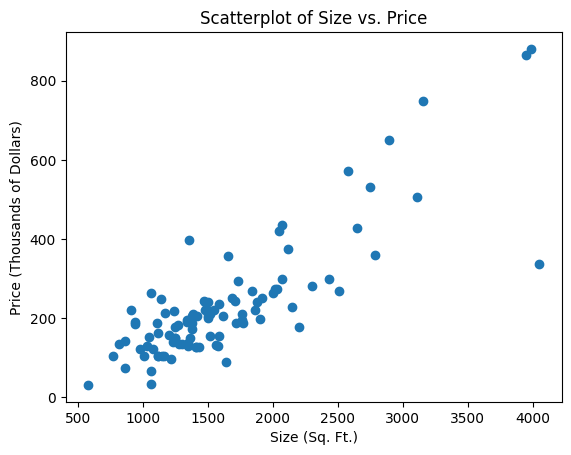

In [24]:
plt.scatter(houses["size"], houses["price"])
plt.title("Scatterplot of Size vs. Price")
plt.xlabel("Size (Sq. Ft.)")
plt.ylabel("Price (Thousands of Dollars)")
plt.show()

Part b. Find the correlation between the two variables.

In [25]:
correlation = houses["size"].corr(houses["price"])
print(f"Correlation between Size and Price: {correlation}")

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Linear Regression

Coefficient: 0.18989116794379637
Intercept: -76.3893821074686



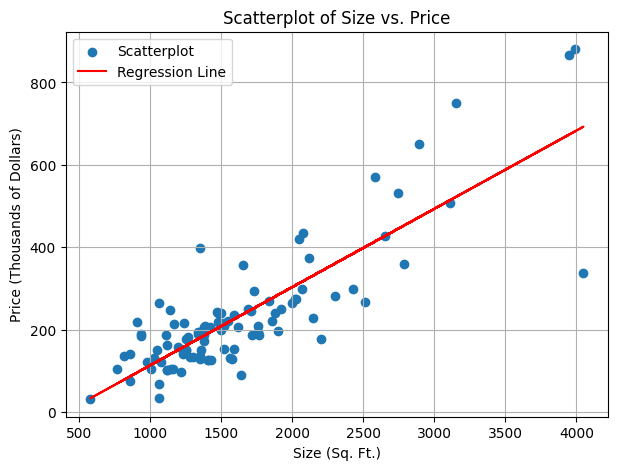

In [26]:
from sklearn.linear_model import LinearRegression

x = houses[['size']]
y = houses['price']
lin_reg_model = LinearRegression()
lin_reg_model.fit(x, y)
slope = lin_reg_model.coef_[0]
intercept = lin_reg_model.intercept_
print(f"Linear Regression\n\nCoefficient: {slope}\nIntercept: {intercept}\n")

plt.figure(figsize=(7,5))
plt.scatter(x, y, label="Scatterplot")
plt.plot(x, lin_reg_model.predict(x), color="red", label="Regression Line")
plt.title("Scatterplot of Size vs. Price")
plt.xlabel("Size (Sq. Ft.)")
plt.ylabel("Price (Thousands of Dollars)")
plt.grid(True)
plt.legend()
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 700x500 with 0 Axes>

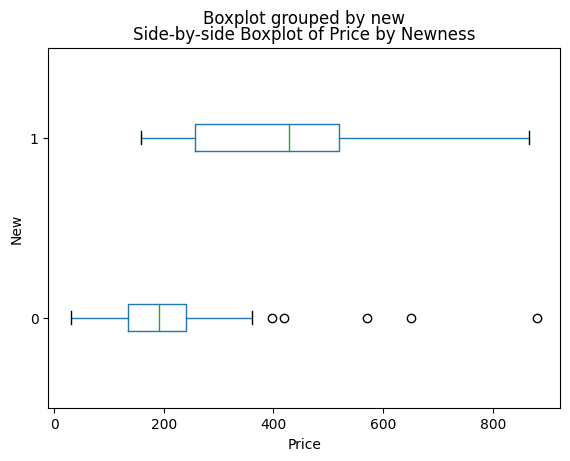

In [27]:
plt.figure(figsize=(7,5))
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.xlabel("Price")
plt.ylabel("New")
plt.title("Side-by-side Boxplot of Price by Newness")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong, positive correlation between size and price (as caclculated in part 4b and demonstrated by the regression line in part 4c, which clearly has a positive slope and aligns nicely with the scatterplot data); this indicates that the size of a house and the price of a house are directly related, and that as size increases, price increases.

The side-by-side boxplots also seem to indicate a direct relation between price and newness, albeit with a much weaker correlation than the relation between size and price. The data for "old" houses is laregly skewed to the lower side of price (a majority of it occuring below `400`, excluding outliers), and a large amount of the data for "new" houses occurs on the higher side of price (about 50% of the data occuring above `400`), which suggests a positive correlation between price and newness. However, a large amount of the data overlaps between "old" and "new" houses, which can be seen by comparing the boxplots; about 75% of the data for "old" houses exists within the range of the first 50% of data for "new" houses (i.e. the price data from Q1 to the maximum value of the "old" houses overlaps with the price data from the median to the maximum value of the "new" houses), which indicates that the correlation is not very strong.

<!--Never got a response on how we're supposed to be writing these, so I hope I did it alright?-->

<!-- The boxplots showing price by "newness" indicate a direct relation between size and newness, though the correlation doesn't appear to be as strong as that between size and price, as "new" houses cover almost the entire range of prices. However, because the data for "old" houses occurs largely on the lower end of the price range (excluding outliers, its maximum value occurs at just under `400`), and because the data for "new" houses occurs largely on the upper end of the price range (with over 50% of "new" prices being greater than "old" prices, as indicated by the median of the "new" data occuring at just over `400`)

However, because the data for "old" houses does occur largely on the lower end of the price range (excluding outliers), and because a majority of data for "new" houses occurs on the higher end of the price range (the median price for a "new" house is greater than the maximum price depicted by the  -->

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [28]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')

In [29]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
